In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import json
from random import randint
from time import sleep
from selenium import webdriver
import os
import datetime
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
import matplotlib as plt
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.diagnostic as dg
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.diagnostic as dg
from statsmodels.compat import lzip
from statsmodels.stats.stattools import durbin_watson
from scipy import stats

In C:\Users\James\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\James\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\James\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [2]:
# Get current 30 Year fixed rate as of today
url = 'https://www.mortgagenewsdaily.com/mortgage-rates/30-year-fixed'
html = requests.get(url)
soup = bs(html.text, 'html.parser')
soup
mortgageRate = soup.find('div', {'class': 'price'}).text
rate = float(mortgageRate[0:4])
mortgageRate = rate/100
mortgageRate

0.0602

In [ ]:
## Downloading housing list from redfin
url = 'https://www.redfin.com/city/16904/CA/San-Diego'
driver2 = webdriver.Chrome()
sleep(5)
driver2.get(url)
download = driver2.find_element_by_xpath("//a[@id='download-and-save']")
# sleep(randint(10,20))
# now = datetime.datetime.now()
# threading.Thread(target=click(download)).start()
# time = timestamp(now)
# file_title = str(time)
download.click()
# os.chdir('C://Users//James//Downloads')
## load into pandas
print('filename:')
x = input()
homePriceData = pd.read_csv(f'C://Users//James//Downloads//{x}.csv')
driver2.quit()

In [3]:
homePriceData = pd.read_csv(f'C://Users//James//Downloads//redfin_2022-07-14-23-37-58.csv')
homePriceData.describe()

,SOLD DATE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,LATITUDE,LONGITUDE
count,0.0,350.000000,3.500000e+02,349.000000,345.000000,344.000000,2.230000e+02,345.000000,350.000000,344.000000,210.000000,350.000000,350.000000
mean,NaN,92110.431429,1.152220e+06,2.891117,2.195652,1572.177326,5.106879e+04,1978.020290,3.317143,721.299419,379.347619,32.815965,-117.133694
std,NaN,34.933824,1.187877e+06,1.245524,0.915060,874.986008,1.229834e+05,23.284942,5.318993,328.428861,298.746453,0.118195,0.067252
min,NaN,91932.000000,1.400000e+05,0.000000,1.000000,420.000000,1.124000e+03,1897.000000,1.000000,117.000000,14.000000,32.561607,-117.280425
25%,NaN,92105.000000,6.492500e+05,2.000000,2.000000,1032.000000,5.718500e+03,1965.000000,1.000000,561.500000,232.500000,32.732584,-117.181113
50%,NaN,92117.000000,8.799995e+05,3.000000,2.000000,1399.500000,8.359000e+03,1979.000000,1.000000,653.500000,340.000000,32.804265,-117.130152
75%,NaN,92128.000000,1.297250e+06,4.000000,2.500000,1833.250000,3.301050e+04,1995.000000,3.000000,791.500000,458.750000,32.913494,-117.079598
max,NaN,92173.000000,1.800000e+07,7.000000,7.500000,6255.000000,1.178775e+06,2022.000000,44.000000,3711.000000,2897.000000,33.049724,-117.006833


In [13]:
sdRents = pd.read_csv('sdRents.csv')

Autocorrelation: 1.7161225601780346
VIF mean 20.670104564179553
[('Lagrange multiplier statistic', 30.583713733842696), ('p-value', 3.0435137746958085e-05), ('f-value', 5.152469255340916), ('f p-value', 2.8571503821054173e-05)]
RMSE is: 566.02112418159


C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\James\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logPrice   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):          4.76e-222
Time:                        00:57:23   Log-Likelihood:                 1985.9
No. Observations:                2209   AIC:                            -3958.
Df Residuals:                    2202   BIC:                            -3918.
Df Model:                           6                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3122      0.011    303.323      0.000       3.291       3.334
Bathrooms      0.0549      0.007      8.184      0.000       0.042       0.068
Bedrooms       0.0359      0.004      8.720      0.000       0.028       0.044
Laundry       -0.0524      0.003    -20.597      0.000      -0.057      -0.047
Wheelchair     0.0227      0.007      3.138      0.002       0.009       0.037
Pets           0.0100      0.002      6.419      0.000       0.007       0.013
Smoking        0.0069      0.005      1.325      0.185      -0.003       0.017
==============================================================================
Omnibus:                      622.993   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5311.947
Skew:                          -1.082   Prob(JB):                         0.00
Kurtosis:                      10.282   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

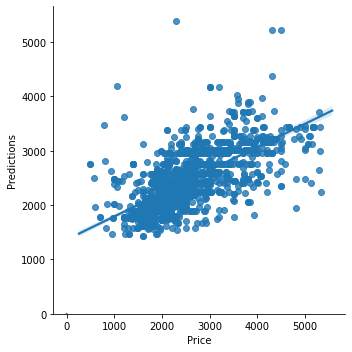

In [28]:
sdRents = pd.read_csv('sdRents.csv')
xValue = []
stepWiseRSquared = []

## first transformations
conditions = [
    (sdRents['yearly_rent'] == 1),
    (sdRents['monthly_rent'] == 1),
    (sdRents['weekly_rent'] ==1),
    (sdRents['daily_rent'] == 1)]
choices = [4,3,2,1]
sdRents['Rental Cadence'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['wood_floors'] == 1),
    (sdRents['carpet_floors'] == 1),
    (sdRents['concrete_floors'] ==1),
    (sdRents['earthen_floors'] == 1)]
choices = [4,3,2,1]
sdRents['Flooring'] = np.select(conditions,choices, default=0)
sdRents.head()

conditions = [
    (sdRents['Dogs OK'] == 1) & (sdRents['Cats OK'] == 1),
    (sdRents['Dogs OK'] == 1) & (sdRents['Cats OK'] == 0),
    (sdRents['Dogs OK'] == 0) & (sdRents['Cats OK'] == 1)]
choices = [3, 2,1]
sdRents['Pets'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['carport'] == 1),
    (sdRents['attached garage'] == 1),
    (sdRents['detached garage'] == 1),
    (sdRents['off-street parking'] == 1),
    (sdRents['street parking'] == 1),
    (sdRents['valet parking'] == 1),
    (sdRents['no parking'] == 1)]
choices = [1,2,3,4,5,6,7]
sdRents['Parking'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['manufactured'] == 1),
    (sdRents['townhouse'] == 1),
    (sdRents['loft'] == 1),
    (sdRents['in-law'] == 1),
    (sdRents['house'] == 1),
    (sdRents['flat'] == 1),
    (sdRents['duplex'] == 1),
    (sdRents['cottage/cabin'] == 1),
    (sdRents['condo'] == 1),
    (sdRents['apartment'] == 1)]
choices = [1,2,3,4,5,6,7,8,9,10]
sdRents['Housing Type'] = np.select(conditions,choices, default=0)

conditions = [
    (sdRents['w/d in unit'] == 1),
    (sdRents['laundry in bldg'] == 1),
    (sdRents['laundry on site'] == 1),
    (sdRents['no laundry on site'] == 1)]
choices = [1,2,3,4]
sdRents['Laundry'] = np.select(conditions,choices, default=0)

sdRents['logSqFt'] = np.log10(sdRents['Sq_Ft'])    


columnList = ['logSqFt','Bedrooms', 'Bathrooms', 'AC', 'Laundry', 'Parking', 'Pets', 'Housing Type', 'Smoking', 
             'Wheelchair', 'Flooring', 'Rental Cadence']

i = 0

while i < len(columnList):
#     print(columnList[i], i)
    xS = columnList[i]
    xValue.append(xS)
    X = sdRents[columnList[i]]
    Y = sdRents["Price"]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X)
    r2 = model.rsquared
    stepWiseRSquared.append(r2)
    i+=1

rSquaredComp = {
    'xValue': xValue,
    'rSquared': stepWiseRSquared
}

stepWiseResults = pd.DataFrame(rSquaredComp)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
stepWiseResults = stepWiseResults.sort_values('rSquared', ascending=False)
X = stepWiseResults[stepWiseResults["rSquared"] > .010]
## to plug in the stepwise values to the regression analysis
X = X['xValue'].tolist()



##collinearity check
X = sdRents[X]
vif_data = pd.DataFrame()
vif_data["xValue"] = X.columns  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

X = vif_data[vif_data["VIF"] < 17]
X = X['xValue'].tolist()
# # ## No sq_Ft or Housing Type

# Testing for Outliers & removing them
z = np.abs(stats.zscore(sdRents['Price']))
##99.7% of data is +/-3
a = list(np.where(z >3))
i = 0
while i < len(a):
    sdRents.drop(a[i], inplace = True)
    i+=1

# ## log transformation code
sdRents['logPrice'] = np.log10(sdRents['Price'])    

X2 = sdRents[X]
Y2 = sdRents["logPrice"]
X2 = sm.add_constant(X2)
model2 = sm.OLS(Y2, X2).fit(cov_type='HC1')
predictions = model2.predict(X2)


## checking for autocorrelation
ac = float(durbin_watson(model2.resid))
print("Autocorrelation:", ac)
print("VIF mean", vif_data["VIF"].mean())

## RMSE Measure
data = {
  "Price": sdRents['Price'],#np.exp(Y),
  "Predictions": 10**predictions#np.exp(predictions)
}

df = pd.DataFrame(data)
df['Error'] = ((df['Predictions'])-(df['Price']))
df['Mean Squared Error'] = math.sqrt((df['Error']**2).mean())
df['Abs Value error'] = abs(df['Error'])
df['Error compared to Mean Error'] = df['Mean Squared Error'] - df['Abs Value error']
df['Error compared to Mean Error'].mean()

# ## Testing linearity
sns.lmplot(x = 'Price', y = 'Predictions', data = df)

# ## Testing Normal Errors
sns.distplot(model2.resid, kde=True)

## Testing for heteroscedasticity
# plt.scatter(x=df.index, y=df.Error, alpha=0.5)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = dg.het_breuschpagan(model2.resid, model2.model.exog)
 
print(lzip(names, test_result))

## If LM's P-Value were <.05 we could reject the null, and say heteroscedasticity is present

# The null hypothesis (H0): Homoscedasticity is present.
# The alternative hypothesis: (Ha): Homoscedasticity is not present (i.e. heteroscedasticity exists)


print('RMSE is:', df['Mean Squared Error'].mean())
model2.summary()

In [36]:
## Clean and transform the data to get it ready for use

X2['Sq_Ft'] = sdRents['Sq_Ft']
X2_SVR = X2.drop(['const', 'Laundry', 'Wheelchair', 'Pets', 'Smoking'], axis=1) ## Remove these to match X Columns in each dataframe
y2 = np.array(Y2, dtype=float)
# X2_SVR = X2.drop(['const'], axis=1)
X2_SVR = np.array(X2_SVR, dtype=float)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X2_SVR, y2)
print("params:",grid.best_params_) 
# print how our model looks after hyper-parameter tuning
print("est:",grid.best_estimator_)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.32975144309659676, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.290826137953366, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.21036621257421917, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.3751898815545621, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.3063659454701768, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.24207290973724682, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ..........................

[CV]  C=100, gamma=0.001, kernel=rbf, score=0.25031679920071026, total=   0.7s
[CV] C=100, gamma=0.001, kernel=rbf ..................................
[CV]  C=100, gamma=0.001, kernel=rbf, score=0.24127124522069054, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.42918321724477604, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.32813222342639814, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.24758073683380957, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.2914429422037481, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.29535421723066946, total=   0.0s
[CV] C=1000, gamma=1, ker

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   48.4s finished
C:\Users\James\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
X3 = homePriceData[['ADDRESS','PRICE','BEDS','BATHS','HOA/MONTH','SQUARE FEET']]
X3 = X3.dropna()
X4 = X3[['BEDS','BATHS','SQUARE FEET']]
X4.astype('int64')

X4 = np.array(X4, dtype=int)

In [38]:
regr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=0.1, epsilon=0.1))
regr.fit(X2_SVR, y2)
predTwo = regr.predict(X4)
scoreM2 = regr.score(X2_SVR, y2)
print("Model2",scoreM2)

C:\Users\James\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Model2 0.4588567125685671


In [41]:
X3['Rental Prediction'] = 10**predTwo
X3

,ADDRESS,PRICE,BEDS,BATHS,HOA/MONTH,SQUARE FEET,Rental Prediction
1,5252 Balboa Arms Dr #186,549900,2.0000,2.0000,323.0000,782.0000,2208.3793
2,15616 New Park Ter,1950000,4.0000,3.0000,171.0000,3037.0000,2563.9065
4,13488 Grain Ln,879000,2.0000,2.0000,90.0000,1030.0000,2771.7922
5,877 Island Ave #216,869000,2.0000,1.5000,762.0000,1352.0000,3172.9253
8,5999 Rancho Mission Rd #214,414900,1.0000,1.0000,368.0000,692.0000,2157.1973
...,...,...,...,...,...,...,...
342,5055 Collwood Blvd #220,649000,2.0000,2.0000,325.0000,971.0000,2601.5852
345,4600 Lamont St #4329,495000,1.0000,1.0000,484.0000,653.0000,2085.4068
347,18560 Caminito Pasadero,949000,3.0000,2.5000,127.0000,1606.0000,3081.2951
348,5328 Corte Playa Jacinto,1279000,4.0000,2.5000,65.0000,2263.0000,2643.6585


In [42]:
## Use home price,downpayment percentage, loan period, HOA, Home Insurance, mortgage Rates to get the payment
## use craigslist data to get predicted rate

targetingList = X3
targetingList.head()

,ADDRESS,PRICE,BEDS,BATHS,HOA/MONTH,SQUARE FEET,Rental Prediction
1,5252 Balboa Arms Dr #186,549900,2.0000,2.0000,323.0000,782.0000,2208.3793
2,15616 New Park Ter,1950000,4.0000,3.0000,171.0000,3037.0000,2563.9065
4,13488 Grain Ln,879000,2.0000,2.0000,90.0000,1030.0000,2771.7922
5,877 Island Ave #216,869000,2.0000,1.5000,762.0000,1352.0000,3172.9253
8,5999 Rancho Mission Rd #214,414900,1.0000,1.0000,368.0000,692.0000,2157.1973


In [43]:
## Required 20% down for investor property
downPaymentPercentage = .2
closingCostPercentage = .03
propertyTaxRate = .0125
loanPayments = 360
targetingList['downpayment'] = downPaymentPercentage*targetingList['PRICE']
targetingList['closingCosts'] = targetingList['PRICE']*closingCostPercentage
targetingList['principal'] = targetingList['PRICE']-targetingList['downpayment']
targetingList['monthlyPropertyTax'] = (targetingList['PRICE'] * propertyTaxRate)/12
targetingList['monthlyMortgageRate'] = mortgageRate/12
targetingList['monthlyMortgageRate_1'] = targetingList['monthlyMortgageRate']+1
targetingList['loanPayments'] = loanPayments
targetingList['loanPayments_1'] = loanPayments-1
targetingList['P&I'] = targetingList['principal']*targetingList['monthlyMortgageRate']*targetingList['monthlyMortgageRate_1']**targetingList['loanPayments']/targetingList['monthlyMortgageRate_1']**targetingList['loanPayments_1']
targetingList['Payment'] = targetingList['P&I']+targetingList['monthlyPropertyTax']+targetingList['HOA/MONTH']
targetingList['yearlyCost'] =  targetingList['Payment']*12
targetingList['Cashflow'] = targetingList['Rental Prediction']-targetingList['Payment']
## Add Homeowners Insurance
yes = 'Yes'
no = 'No'
targetingList['Rent or Not'] = np.where((targetingList['Cashflow'] >= 0), yes,no)


targetingList

,ADDRESS,PRICE,BEDS,BATHS,HOA/MONTH,SQUARE FEET,Rental Prediction,downpayment,closingCosts,principal,monthlyPropertyTax,monthlyMortgageRate,monthlyMortgageRate_1,loanPayments,loanPayments_1,P&I,Payment,yearlyCost,Cashflow,Rent or Not
1,5252 Balboa Arms Dr #186,549900,2.0000,2.0000,323.0000,782.0000,2208.3793,109980.0000,16497.0000,439920.0000,572.8125,0.0050,1.0050,360,359,2218.0034,3113.8159,37365.7913,-905.4366,No
2,15616 New Park Ter,1950000,4.0000,3.0000,171.0000,3037.0000,2563.9065,390000.0000,58500.0000,1560000.0000,2031.2500,0.0050,1.0050,360,359,7865.2604,10067.5104,120810.1252,-7503.6040,No
4,13488 Grain Ln,879000,2.0000,2.0000,90.0000,1030.0000,2771.7922,175800.0000,26370.0000,703200.0000,915.6250,0.0050,1.0050,360,359,3545.4174,4551.0424,54612.5087,-1779.2502,No
5,877 Island Ave #216,869000,2.0000,1.5000,762.0000,1352.0000,3172.9253,173800.0000,26070.0000,695200.0000,905.2083,0.0050,1.0050,360,359,3505.0827,5172.2911,62067.4927,-1999.3657,No
8,5999 Rancho Mission Rd #214,414900,1.0000,1.0000,368.0000,692.0000,2157.1973,82980.0000,12447.0000,331920.0000,432.1875,0.0050,1.0050,360,359,1673.4854,2473.6729,29684.0749,-316.4756,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5055 Collwood Blvd #220,649000,2.0000,2.0000,325.0000,971.0000,2601.5852,129800.0000,19470.0000,519200.0000,676.0417,0.0050,1.0050,360,359,2617.7200,3618.7617,43425.1401,-1017.1765,No
345,4600 Lamont St #4329,495000,1.0000,1.0000,484.0000,653.0000,2085.4068,99000.0000,14850.0000,396000.0000,515.6250,0.0050,1.0050,360,359,1996.5661,2996.1911,35954.2933,-910.7843,No
347,18560 Caminito Pasadero,949000,3.0000,2.5000,127.0000,1606.0000,3081.2951,189800.0000,28470.0000,759200.0000,988.5417,0.0050,1.0050,360,359,3827.7601,4943.3017,59319.6209,-1862.0067,No
348,5328 Corte Playa Jacinto,1279000,4.0000,2.5000,65.0000,2263.0000,2643.6585,255800.0000,38370.0000,1023200.0000,1332.2917,0.0050,1.0050,360,359,5158.8042,6556.0958,78673.1498,-3912.4373,No


In [44]:
targetingList[(targetingList["Rent or Not"] == 'Yes') & (targetingList['downpayment'] <75000)] 

,ADDRESS,PRICE,BEDS,BATHS,HOA/MONTH,SQUARE FEET,Rental Prediction,downpayment,closingCosts,principal,monthlyPropertyTax,monthlyMortgageRate,monthlyMortgageRate_1,loanPayments,loanPayments_1,P&I,Payment,yearlyCost,Cashflow,Rent or Not
210,1625 Hotel Cir S Unit C208,374000,0.0000,1.0000,313.0000,422.0000,2251.2400,74800.0000,11220.0000,299200.0000,389.5833,0.0050,1.0050,360,359,1508.5166,2211.0999,26533.1994,40.1400,Yes
255,3494 Del Sol Blvd Unit D,340000,2.0000,1.0000,316.0000,800.0000,2381.2323,68000.0000,10200.0000,272000.0000,354.1667,0.0050,1.0050,360,359,1371.3787,2041.5454,24498.5449,339.6869,Yes
